In [1]:
import requests
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

from Fantasy import Fantasy

In [2]:
league = 'fpl'

if league == 'fpl':
    url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
else:
    url = 'https://fantasy.allsvenskan.se/api/bootstrap-static/'

response = requests.get(url)
json = response.json()

# due to FDR
unwanted_teams = []

higher_than_zero = ['value_season', 'form', 'value_form', 'minutes', 'points_per_game']

fantasy = Fantasy(json, unwanted_teams, higher_than_zero)


def getBarPlot(column, element):
    pivot = fantasy.createPivot(column, element).sort_values(element)

    pivot.plot(kind='barh', x=column, figsize=(10,6))


def getScatterPlot(position, x, y):
    df = fantasy.dfFiltered('element_type', position, 'value_season')

    ax = df.plot.scatter(x=x, y=y, alpha=.5, figsize=(
        20, 10), title=f"{position}: {x} v {y}")

    for i, txt in enumerate(df.web_name):
        ax.annotate(txt, (df[x].iat[i], df[y].iat[i]))

    plt.grid(which='both', axis='both', ls='-')
    plt.show()


# Aggregate

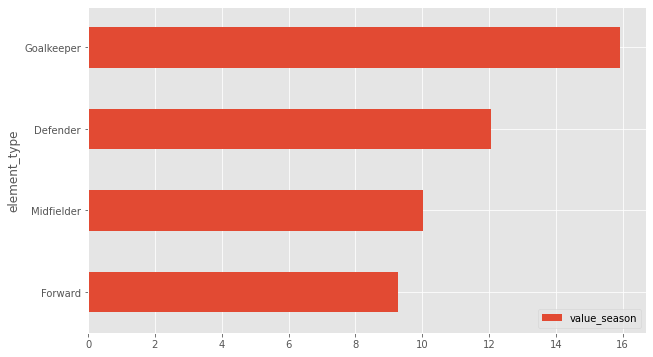

In [4]:
# Avg value per position
getBarPlot('element_type', 'value_season')

In [ ]:
# Avg value per team
getBarPlot('team', 'value_season')

In [ ]:
# Avg form per team
getBarPlot('team', 'form')

# Players overall

In [5]:
# Sorting by value season
fantasy.getPlayerDf().sort_values('value_season_adj', ascending=False).head(10)

,web_name,team,element_type,points_per_game,now_cost,minutes,value_season,total_points,form,value_form,value_season_adj
272,Begović,Everton,Goalkeeper,6.0,40,180.0,3.0,12,3.7,0.9,1.500000
211,Sarr,Chelsea,Defender,5.8,49,420.0,5.9,29,2.7,0.6,1.180000
402,Stones,Man City,Defender,5.6,52,861.0,11.9,62,4.5,0.9,1.074839
212,Chalobah,Chelsea,Defender,4.9,47,1177.0,17.7,83,8.7,1.9,1.044940
209,James,Chelsea,Defender,6.4,62,1184.0,17.6,109,6.0,1.0,1.033394
364,Matip,Liverpool,Defender,4.9,50,2070.0,22.6,113,6.3,1.3,0.980000
32,Ramsdale,Arsenal,Goalkeeper,4.9,51,2160.0,22.9,117,3.0,0.6,0.959060
699,Ait Nouri,Wolves,Defender,4.2,44,1372.0,16.4,72,2.5,0.6,0.956667
14,Tierney,Arsenal,Defender,4.8,51,1916.0,20.8,106,3.5,0.7,0.941887
683,Jonny,Wolves,Defender,4.2,45,355.0,4.7,21,5.2,1.2,0.940000


In [6]:
# Sorting by form
fantasy.getPlayerDf().sort_values('form', ascending=False).head(10)

,web_name,team,element_type,points_per_game,now_cost,minutes,value_season,total_points,form,value_form,value_season_adj
208,Havertz,Chelsea,Midfielder,4.2,79,1300.0,10.8,85,11.0,1.4,0.533647
401,De Bruyne,Man City,Midfielder,5.6,117,1531.0,10.5,123,10.5,0.9,0.478049
84,Toney,Brentford,Forward,4.4,67,2188.0,16.3,109,10.3,1.5,0.657982
566,Kane,Spurs,Forward,4.9,125,2421.0,10.9,136,10.0,0.8,0.392721
212,Chalobah,Chelsea,Defender,4.9,47,1177.0,17.7,83,8.7,1.9,1.044940
457,Ronaldo,Man Utd,Forward,4.9,122,1914.0,9.6,117,8.5,0.7,0.402051
404,Mahrez,Man City,Midfielder,5.2,87,1203.0,13.1,114,8.5,1.0,0.597544
221,Guaita,Crystal Palace,Goalkeeper,3.7,46,2115.0,19.3,89,8.5,1.8,0.802360
377,Alexander-Arnold,Liverpool,Defender,7.2,84,2313.0,22.3,187,8.3,1.0,0.858610
56,Cash,Aston Villa,Defender,4.1,53,2567.0,22.6,120,8.0,1.5,0.772167


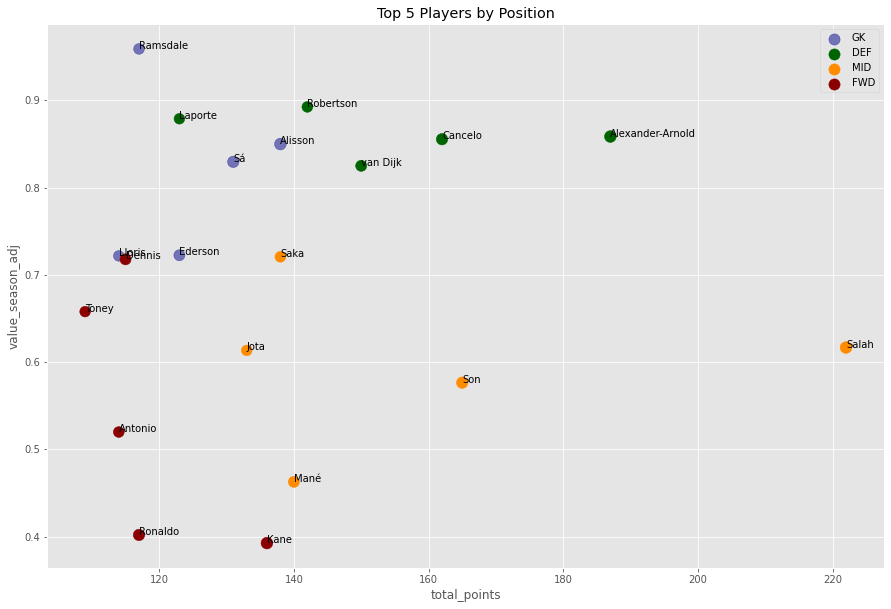

In [7]:
# Scatterplot of most valuable players

x = 'total_points'
y = 'value_season_adj'

top_gk = fantasy.dfFiltered('element_type', 'Goalkeeper', x).head()
top_def = fantasy.dfFiltered('element_type', 'Defender', x).head()
top_mid = fantasy.dfFiltered('element_type', 'Midfielder', x).head()
top_fwd = fantasy.dfFiltered('element_type', 'Forward', x).head()

ax = top_gk.plot.scatter(x=x, y=y, color='DarkBlue', label='GK', s=top_gk[x], alpha=.5, figsize=(15,10), title="Top 5 Players by Position")
for i, txt in enumerate(top_gk.web_name):
    ax.annotate(txt, (top_gk[x].iat[i],top_gk[y].iat[i]))

top_def.plot.scatter(x=x, y=y, color='DarkGreen', label='DEF', s=top_gk[x], ax=ax)
for i, txt in enumerate(top_def.web_name):
    ax.annotate(txt, (top_def[x].iat[i],top_def[y].iat[i]))
    
top_mid.plot.scatter(x=x, y=y, color='DarkOrange', label='MID', s=top_gk[x], ax=ax)
for i, txt in enumerate(top_mid.web_name):
    ax.annotate(txt, (top_mid[x].iat[i],top_mid[y].iat[i]))
    
top_fwd.plot.scatter(x=x, y=y, color='DarkRed', label='FWD', s=top_gk[x], ax=ax)
for i, txt in enumerate(top_fwd.web_name):
    ax.annotate(txt, (top_fwd[x].iat[i],top_fwd[y].iat[i]))

# Goalkeepers

In [8]:
# Value
fantasy.dfFiltered('element_type', 'Goalkeeper', 'value_season_adj').head(5)

,web_name,team,element_type,points_per_game,now_cost,minutes,value_season,total_points,form,value_form,value_season_adj
272,Begović,Everton,Goalkeeper,6.0,40,180.0,3.0,12,3.7,0.9,1.500000
32,Ramsdale,Arsenal,Goalkeeper,4.9,51,2160.0,22.9,117,3.0,0.6,0.959060
86,Raya,Brentford,Goalkeeper,3.9,43,1440.0,14.7,63,3.7,0.9,0.910000
371,Alisson,Liverpool,Goalkeeper,5.1,60,2430.0,23.0,138,8.0,1.3,0.850000
700,Sá,Wolves,Goalkeeper,4.4,53,2700.0,24.7,131,4.0,0.8,0.829618


In [9]:
# Form
fantasy.dfFiltered('element_type', 'Goalkeeper', 'form').head(5)

,web_name,team,element_type,points_per_game,now_cost,minutes,value_season,total_points,form,value_form,value_season_adj
221,Guaita,Crystal Palace,Goalkeeper,3.7,46,2115.0,19.3,89,8.5,1.8,0.802360
371,Alisson,Liverpool,Goalkeeper,5.1,60,2430.0,23.0,138,8.0,1.3,0.850000
293,Schmeichel,Leicester,Goalkeeper,3.3,48,2430.0,18.8,90,5.0,1.0,0.689333
210,Mendy,Chelsea,Goalkeeper,4.2,61,2160.0,16.7,102,4.3,0.7,0.687647
700,Sá,Wolves,Goalkeeper,4.4,53,2700.0,24.7,131,4.0,0.8,0.829618


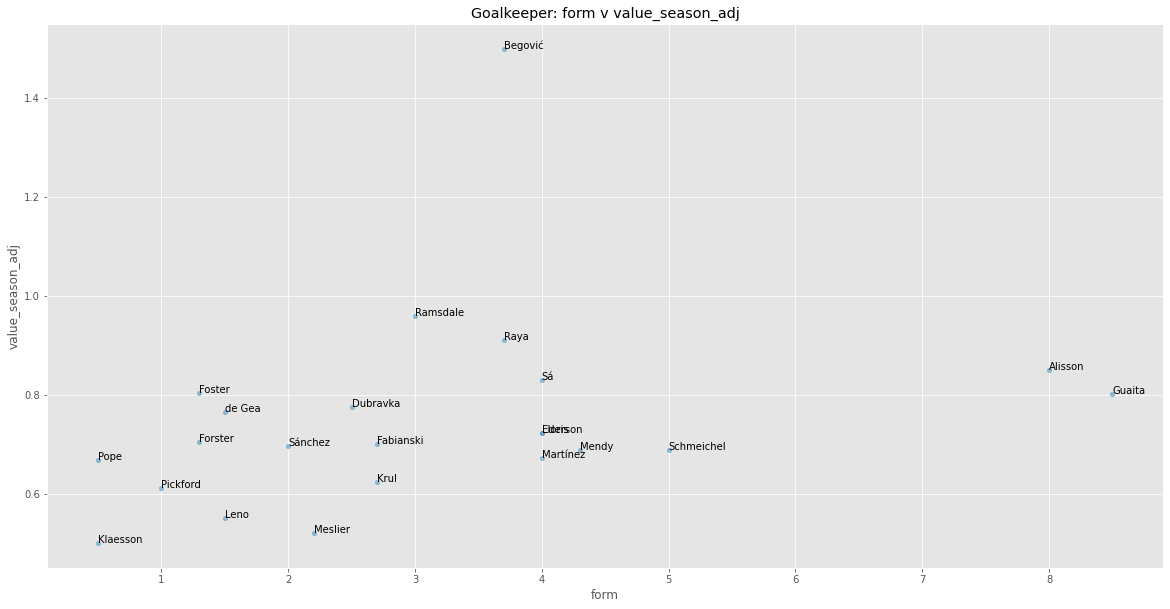

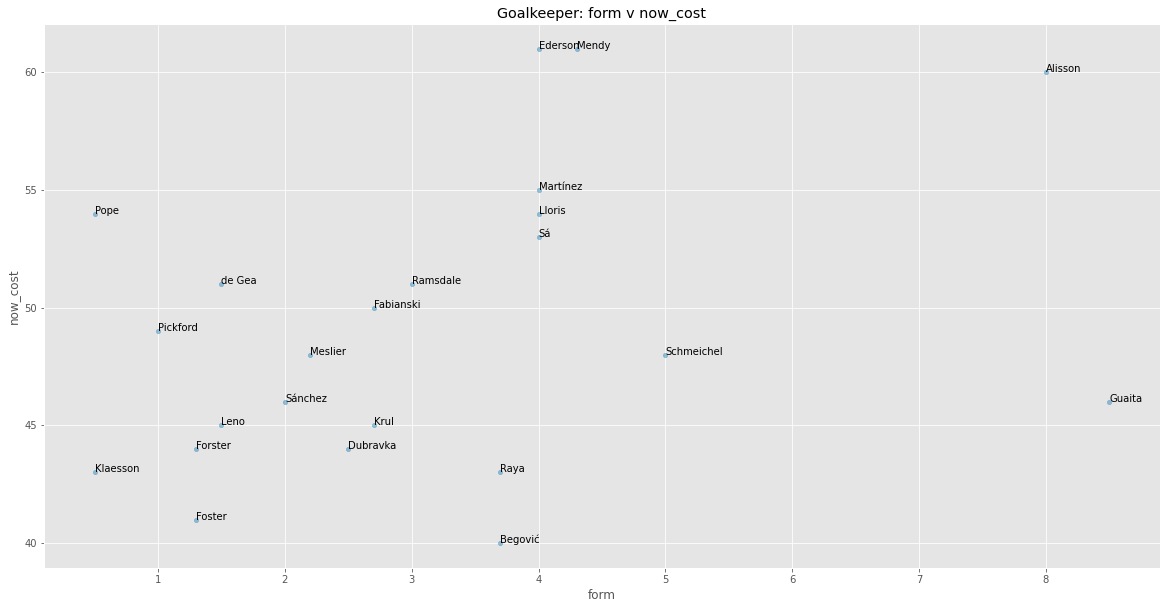

In [11]:
getScatterPlot('Goalkeeper', 'form', 'value_season_adj')
getScatterPlot('Goalkeeper', 'form', 'now_cost')

# Defenders

In [ ]:
# Value
fantasy.dfFiltered('element_type', 'Defender', 'value_season').head(5)

In [ ]:
# Form
fantasy.dfFiltered('element_type', 'Defender', 'form').head(5)

In [ ]:
getScatterPlot('Defender', 'form', 'value_season')
getScatterPlot('Defender', 'form', 'now_cost')

# Midfielders

In [ ]:
# Value
fantasy.dfFiltered('element_type', 'Midfielder', 'value_season').head(5)

In [ ]:
# Value
fantasy.dfFiltered('element_type', 'Midfielder', 'form').head(5)

In [ ]:
getScatterPlot('Midfielder', 'form', 'value_season')
getScatterPlot('Midfielder', 'form', 'now_cost')

# Forwards

In [ ]:
# Value
fantasy.dfFiltered('element_type', 'Forward', 'value_season').head(5)

In [ ]:
# Value
fantasy.dfFiltered('element_type', 'Forward', 'form').head(5)

In [ ]:
getScatterPlot('Forward', 'form', 'value_season')
getScatterPlot('Forward', 'form', 'now_cost')